# SMILES (Simplified Molecular Input Line Entry System)

SMILES는 ASCII 문장으로 분자의 구조를 나타내기 위한 표기법이다.<br>
복잡한 분자나 반응을 알파벳이나 숫자를 사용하여 간단하게 나타낼 수 있다.<br>
분자 구조의 SMILES 표기는 구조를 나타내는 다른 방법들보다 차지하는 공간이 작다.
<br><br>
**Ex**<br>
에탄 $C_2H_6$ : CC<br>
에탄올 $C_2H_6O$ : CCO, OCC, C(O)C <br>
치환반응 [I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI

## SMILES 인코딩 규칙 설명

### 1. Canonicalization (정규화)
위의 에탄올의 예시와 같이 어떤 구조에 대해서 하나가 아니라 유효한 여러개의 SMILES들이 있다. 모든 SMILES 중에서 특수한 하나의 일반적인 SMILES를 만들기 위한 알고리즘이 있다. 이러한 알고리즘을 통해서 형성된 SMILES를 **unique SMILES**라고 한다.<br>
동위원소와 카이랄을 표현하기위한 SMILES를 **isomeric SMILES**이라 한다.<br>
'isomeric SMILES'에도 위와 같은 알고리즘을 적용해 일반적인 하나의 SMILES를 만든 것을 **absolute SMILES**라 한다.

Input SMILES | Unique SMILES
------------ | -------------  
OCC | CCO
[CH3][CH2][OH]  | CCO
C-C-O | CCO
C(O)C | CCO
OC(=O)C(Br)(Cl)N | NC(Cl)(Br)C(=O)O
ClC(Br)(N)C(=O)O | NC(Cl)(Br)C(=O)O
O=C(O)C(N)(Br)Cl | NC(Cl)(Br)C(=O)O

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# SMILES 분자를 그림으로 출력

RDKit WARNING: [12:07:30] Enabling RDKit 2019.09.1 jupyter extensions


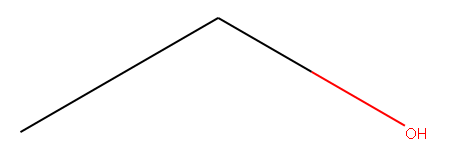

In [9]:
Chem.MolFromSmiles('OCC')

In [3]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCC'))

'CCO'

In [4]:
Chem.MolToSmiles(Chem.MolFromSmiles('C-C-O'))

'CCO'

unique SMILES 로 출력된다.

### 2. Specification Rules
SMILES는 공백이 없는 문자열로 이루어진다. 수소 원자는 표기에 생략될 수도 포함될 수도 있다. 방향족 구조는 직접 나타내거나 케쿨레 형태로 나타낼 수 있다.<br>
5가지 일반적인 SMILES 인코딩 규칙이 있다. (**원자, 결합, 가지, 고리, 분리**)
<br>

#### 1) 원자
* 원자는 원소기호를 이용해 표현한다.
* 수소를 가지지 않는 원자는 [원소기호]로 나타낸다.
* 'organic subset', B, C, N, O, P, S, F, Cl, Br, I 는 [] 없이 쓰이기도 한다. ( 결합된 수소 수가 결합의 원자가와 일치할 때)

SMILES | name | .
------------ | ------------- | ----------  
C |  methane | (CH4)
P | phosphine | (PH3)
N | ammonia | (NH3)
S | hydrogen sulfide | (H2S)
O | water | (H20)
Cl | hydrochloric acid | (HCl)


* 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 소문자 'c'로 `[]` 안에 표현한다.
* '[', ']'속의 수소와 형식전하는 나타내어야 한다. 결합된 수소 수는 원소기호 H와 숫자로 나타낸다.
* 전하는 `+` 혹은 `-` 로 표시되어야 한다. 명시되어 있지 않으면 전하는 0으로 가정한다. 또한 2가 양이온, 음이온 혹은 그 이상은 숫자를 이용하여 표현할 수 있다.

SMILES | name
------------|------------
[H+]  |proton 
[Fe+2] | iron (II) cation 
[OH-] | hydroxyl anion 
[Fe++] | iron (II) cation 
[OH3+] | hydronium cation 
[NH4+] | ammonium cation 


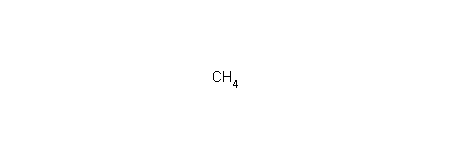

In [7]:
a=Chem.MolFromSmiles('C')
a

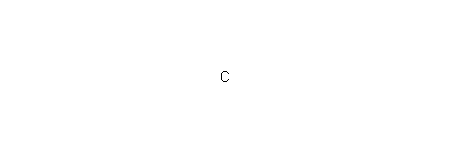

In [8]:
b=Chem.MolFromSmiles('[C]')
b

#### 2) 결합
* 단일결합 `-`
* 이중결합 `=`
* 삼중결합 `#`
* 방향족결합 `:`
<br>
<br>
* 인접 원자는 단일 또는 방향족 결합으로 서로 연결되는 것으로 가정한다. (단일 및 방향족 결합은 대부분 생략할 수 있음)

SMILES | name | .
-------|-------|--------
CC | ethane | (CH3CH3)
C=O | formaldehyde | (CH2O)
C=C | ethene | (CH2=CH2)
O=C=O | carbon dioxide | (CO2)
COC | dimethyl ether | (CH3OCH3)
C#N | hydrogen cyanide | (HCN)
CCO | ethanol | (CH3CH2OH)
[H][H] | molecular hydrogen | (H2)


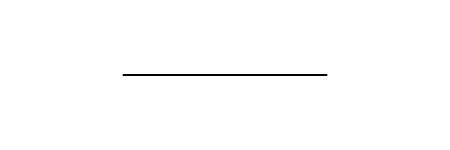

In [10]:
a=Chem.MolFromSmiles('CC')
a

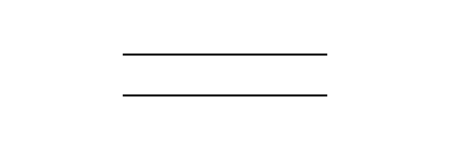

In [12]:
b=Chem.MolFromSmiles('C=C')
b

* 6-hydroxy-1,4-hexadiene - 유효한 SMILES 3가지

Structure|valid SMILES
---------|------------
  | C=CCC=CCO
CH2=CH-CH2-CH=CH-CH2-OH | C=C-C-C=C-C-O
  |OCC=CCC=C

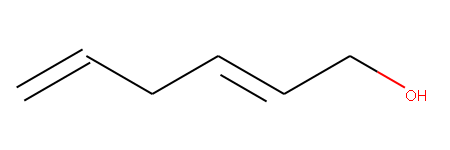

In [13]:
a=Chem.MolFromSmiles('C=CCC=CCO')
a

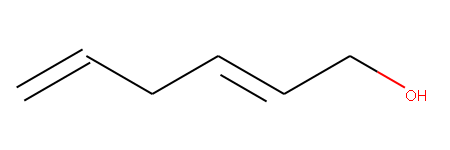

In [14]:
b=Chem.MolFromSmiles('C=C-C-C=C-C-O')
b

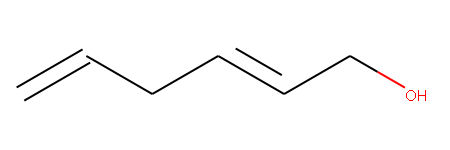

In [16]:
c=Chem.MolFromSmiles('OCC=CCC=C')
c

유효한 SMILES 3가지 모두 같은 구조로 나타난다.

#### 3) 가지
* 가지(치환기)는 소괄호`()`를 이용해서 나타낼 수 있으며 중첩되거나 쌓일 수 있다. 
* 소괄호는 치환기가 결합된 원자 오른쪽에 쓴다.

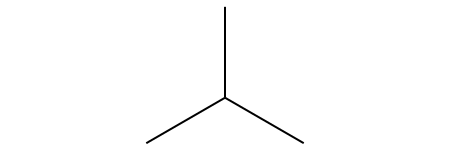

In [17]:
# iso-butane
a=Chem.MolFromSmiles('CC(C)C')
a

<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림1.PNG" width="700" height="300">

#### 4) 고리
* 고리 구조는 고리에서 하나의 결합을 깨는 것으로 표시한다.
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림2.PNG" width="500" height="250">

* 결합을 끊은 원자 바로 오른쪽에 숫자를 표시해 고리를 나타낸다. ( (a)와 (b) 같은 분자 )
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림3.PNG" width="500" height="250">
* SMILES for cubane : **C12C3C4C1C5C4C3C25**
<img src="https://raw.githubusercontent.com/asd93/a/master/c/FP/p/그림4.PNG" width="500" height="250">